# Principal Component Analysis (PCA)

### Principal Component Analysis

Consider there is a $q$-dimensional random vector

$$
X \sim (m, \Sigma)
$$

where

$$
\begin{gather*}
m=\mathbb E[X]=\begin{bmatrix}
m_1 \\ \vdots \\ m_q\end{bmatrix}
\\
\Sigma=\text{Var}[X]=\begin{bmatrix} \Sigma_{11}&\cdots&\Sigma_{1q}\\ \vdots&\ddots&\vdots
\\
\Sigma_{q1}&\cdots&\Sigma_{qq}
\end{bmatrix}
\end{gather*}
$$

If we were to approximate $X$ through a single straight line, one approach would be to choose a line that minimises the expected squared distances between $X$ and their projections $X'$ onto the line. 

![pca-projection](../../../figures/pca-projection.jpeg)

Pythagorean theorem gives

$$
\begin{align*}
\mathbb E[\overline{XX'}^2]=\mathbb E[\overline{mX}^2]-\mathbb E[\overline{mX'}^2]
\end{align*}
$$

where $\overline{XX'}=\|X-X'\|$. As $\mathbb E[\overline{mX}^2]$ does not depend on the fitted line, minimising $\mathbb E[\overline{XX'}^2]$ is the same as maximising $\mathbb E[\overline{mX'}^2]$.

Investigating this quantity further, let $\gamma$ be a unit vector pointing in the direction of the vector $X'-m$ and let $t\in\R$ be a scalar such that the projected point is given by

$$
\begin{align*}
X'=m+t\gamma \in\R^q.
\end{align*}
$$
    
The Euclidean distance between $m$ and $X'$, $\overline{mX'}$, equals $|t|$. We have by definition
        
$$
\begin{align*}
\cos(\gamma,X-m)=\frac{t}{\|X-m\|}
\end{align*}
$$

and using the properties of the dot product gives

$$
\begin{align*}
\gamma^T(X-m)=\|\gamma\|\cdot\|X-m\|\cos(\gamma,X-m)=t.
\end{align*}
$$
        
To maximise $\mathbb E[\overline{mX'}^2]$, we have
        
$$
\begin{align*}
\mathbb E[\overline{mX'}^2]&=\mathbb E[\overline{mX'}\cdot \overline{mX'}]
\\
&=\mathbb E[\gamma^T(X-m)(X-m)^T\gamma]
\\
&= \text{Var}[\gamma^T(X-m)]
\\
&= \text{Var}[\gamma^T X]
\\
&= \gamma^T \text{Var}[X] \gamma
\\
&= \gamma^T\Sigma\gamma.
\end{align*}
$$
        
Hence, we need to maximise $\gamma^T\Sigma\gamma$ under the constraint $\|\gamma\|^2=\gamma^T\gamma=1$. This is a constrained maximisation problem which can be addressed through the use of a Lagrange multiplier. Define
        
$$
\begin{align*}
P(\gamma)=\gamma^T\Sigma\gamma-\lambda(\gamma^T\gamma-1).
\end{align*}
$$
        
Then
        
$$
\begin{align*}
\frac{\partial P}{\partial \gamma}=2\Sigma\gamma-2\lambda \gamma
\end{align*}
$$
        
Setting this equal to zero yields
        
$$
\begin{align*}
\Sigma\gamma=\lambda\gamma.
\end{align*}
$$
        
So, $\gamma$ must be an eigenvector of $\Sigma$. Multiplying the above equation with $\gamma^T$, we have
        
$$
\begin{gather*}
\gamma^T\Sigma\gamma=\lambda\gamma^T\gamma=\lambda
\\
\text{Var}[\gamma^T X]=\gamma^T\Sigma\gamma=\lambda.
\end{gather*}
$$

whose left hand side is exactly what we want to maximise. Maximising $\text{Var}[\gamma^T X]$ means that we need to choose the eigenvector $\gamma_1$ corresponding to the largest eigenvalue $\lambda_1$. The new random variable $\gamma_1^T X$ is the linear combination of $X=(X_1,\cdots,X_q)^T$ with maximal variance, and is called the first principal component (PC) of $X$, and the line
        
$$
\begin{align*}
g_1(t)=m+t\gamma_1
\end{align*}
$$
        
is the corresponding first principal component line.
        
Similarly, we define higher-order PC’s: The $j$-th eigenvector $\gamma_j$ maximises $\text{Var}[\gamma^TX]$ over all $\gamma$ which are orthogonal to $\gamma_1,\cdots,\gamma_{j-1}$. The $j$-th PC is given by $\gamma_j^T X$ and $g_j(t)=m+t\gamma_j$ is the corresponding $j$-th PC line. For data $Z$, we need to replace $m$ and $\hat m$, and $\Sigma$ by some estimate $\hat \Sigma$ (ML - maximum likelihood of sample), yielding $\hat \lambda_1,\cdots,\hat\lambda_q,\hat\gamma_1,\cdots,\hat\gamma_q$. Note that principal components minimise the (sum of squared) orthogonal distances between data $X_1,\cdots,X_n$ and the line, unlike vertical distances as in the regression context.

### Decomposing Variance



For the $j$-th eigenvector $\gamma_j$ of $\Sigma$, we have
    
$$
\begin{align*}
\Sigma\gamma_j=\lambda_j\gamma_j
\end{align*}
$$

for $j=1,\cdots,q$.
    
We can bind these $q$ vectors together to form $q\times q$ matrices:
    
$$
\begin{gather*}
(\Sigma\gamma_1,\cdots,\Sigma\gamma_q)=(\lambda_1\gamma_1,\cdots,\lambda_q\gamma_q)
\\
\Sigma(\gamma_1,\cdots,\gamma_q)=(\gamma_1,\cdots,\gamma_q)\begin{bmatrix}
\lambda_1&&
\\
&\ddots&
\\
&&\lambda_q
\end{bmatrix}
\\
\Sigma\Gamma=\Gamma\Lambda
\\
\Sigma=\Gamma\Lambda\Gamma^{-1}=\Gamma\Lambda\Gamma^T
\end{gather*}
$$
    
This decomposition is called the eigen decomposition of $\Sigma$. Now we have
    
$$
\begin{align*}
\lambda_j=\text{Var}[\gamma_j^T X]
\end{align*}
$$
    
so the $\lambda_j$ provide some decomposition of variance and each $\lambda_j$ takes the shares of something. Computing their sum we obtain
        
$$
\begin{align*}
\lambda_1+\cdots+\lambda_q=\text{Tr}(\Lambda)=\text{Tr}(\Gamma^T\Sigma\Gamma)=\text{Tr}(\Gamma\Gamma^T\Sigma)=\text{Tr}(\Sigma)\equiv\text{TV}[X].
\end{align*}
$$
        
The trace of the variance matrix is called the total variance. Therefore,
        
$$
\begin{align*}
\frac{\lambda_j}{\lambda_1+\cdots+\lambda_q}=\frac{\text{Var}[\gamma_j^TX]}{\text{TV}[X]}
\end{align*}
$$

is the proportion of total variance explained by the $j$-th principal component.
        

### Scaling

If the variables operate on different scales/units, the decomposition of variance may not be meaningful as it depends on the units chosen. To avoid problems of this type, we standardise all variables by dividing through their standard deviation
    
$$
\begin{align*}
\tilde X_j=\frac{X_j}{\text{SD}[X_j]}
\end{align*}
$$

and then apply PCA to $\tilde X=(\tilde X_1,\cdots,\tilde X_q)^T$.
    
Observe that for eigenvalues of $\lambda_1,\cdots,\lambda_q$ of the variance matrix of $\tilde X$,
    
$$
\begin{align*}
\lambda_1+\cdots+\lambda_q=\text{Tr}(\text{Var}[\tilde X])=1+\cdots+1=q
\end{align*}
$$

meaning that the eigenvalues of the correlation matrix always add up to the dimension of the random vector.

### Data Compression (Dimensionality Reduction)

Let $x_1,\cdots,x_n$ be sampled from the $q$-dimensional random variable $X\sim (m,\Sigma)$ yielding a data matrix (or data frame)
    
$$
\begin{align*}
\begin{bmatrix}
x_1^T \\ \vdots \\ x_n^T
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & \cdots & x_{1q}
\\
\vdots & \ddots & \vdots
\\
x_{n1} & \cdots & x_{nq}
\end{bmatrix}
\in \R^{n\times q}.
\end{align*}
$$
    
Assume a PCA has been carried out as usual, yielding $m$, $\Sigma$, $\gamma_1,\cdots,\gamma_q$, $\lambda_1,\cdots,\lambda_q$.
Suppose we wish to compress the data towards a smaller dimension $d\leq q$. The scree plot usually can be split into a left-hand part that contains the components which capture significant variation in the data, and a right-hand part which just contains noise or scree. We cut off where this breakpoint, also called “knee”, is deemed to be situated
        
![pca-scree](../../../figures/pca-scree.png)
        
Data compression means projection. We project all data points $x_i$ for $i=1,\cdots,n$ onto the $d$-dimensional subspace by the $d$ largest principal components:
        
$$
\begin{align*}
f:\R^q\to\R^d,x_i\mapsto(\gamma_1,\cdots,\gamma_d)^T(x_i-m)
\end{align*}
$$

where the $f(x_i)\equiv t$ are called principal component scores.
        
If desired, scores can be mapped back to the data space:
        
$$
\begin{align*}
g:\R^d\to\R^q, t_i\mapsto m+(\gamma_1,\cdots,\gamma_d)t_i
\end{align*}
$$

which leads to reconstructed values $r_i\equiv(g\circ f)(x_i)$.

The original data will not be exactly reconstructed, unless $d=q$. When $d=q$, we have
                
$$
\begin{align*}
(g\circ f)(x_i)&=g(f(x_i))
\\
&=m+(\gamma_1,\cdots,\gamma_d)(\gamma_1,\cdots,\gamma_d)^T(x_i-m)
\\
&=m+\Gamma\Gamma^T(x_i-m)
\\
&= m+x_i-m
\\
&= x_i.
\end{align*}
$$

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
credit_card_data = fetch_ucirepo(id=350)
X = credit_card_data.data.features
feature_names = credit_card_data.variables['description'].iloc[1:24].to_list()
X.columns = feature_names
targets = credit_card_data.data.targets['Y'].to_list()

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


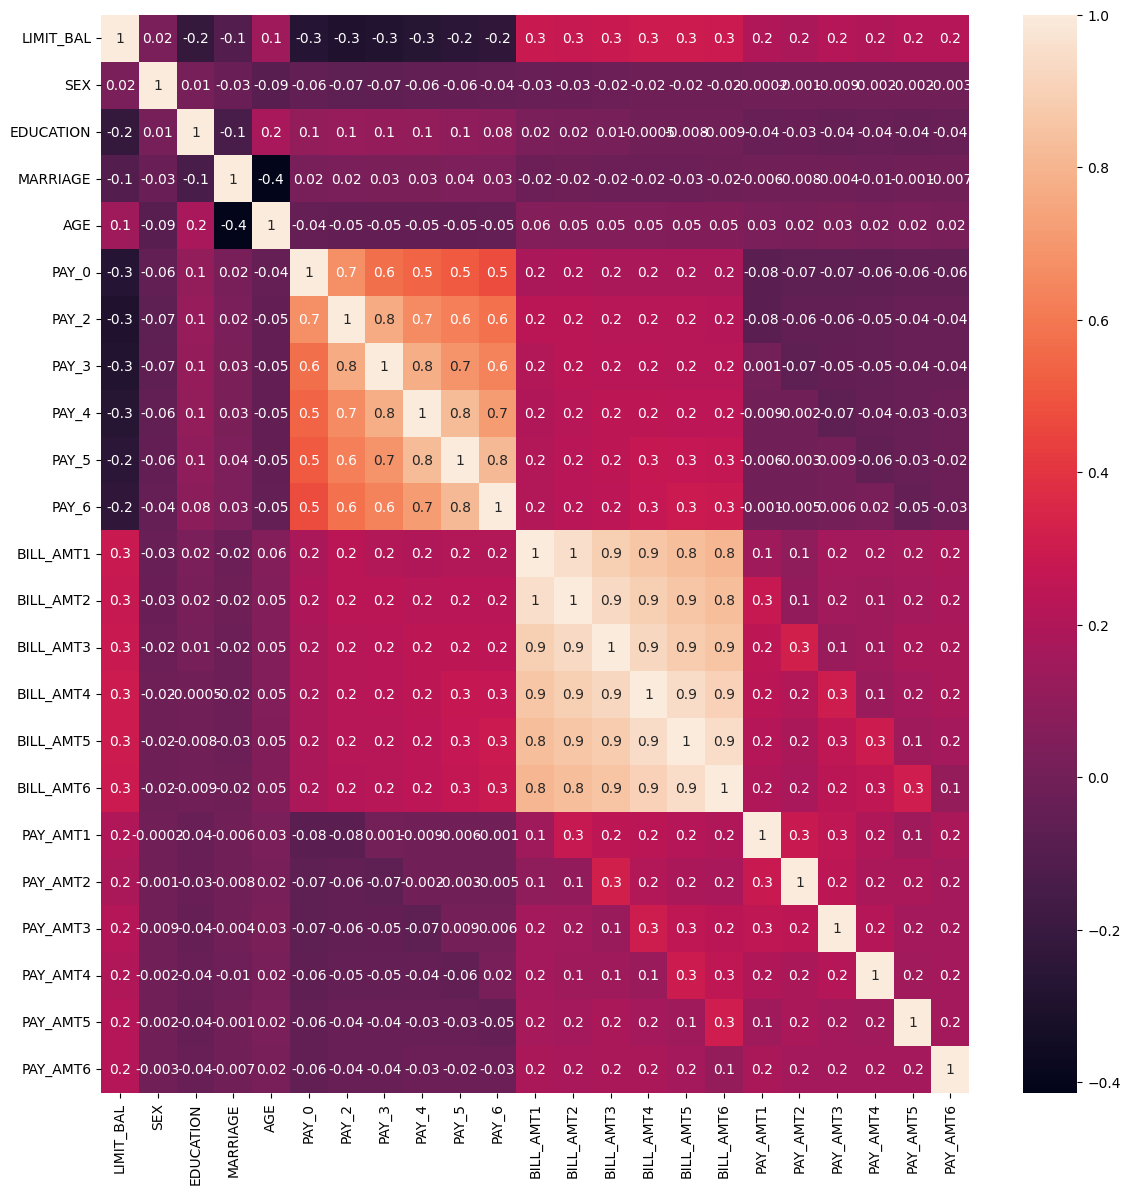

In [3]:
# correlation heatmap

corr = X.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

A very high correlation among `BILL_AMT` features is observed, so we focus on the six features, namely `BILL_AMT1` - `BILL_AMT6`. 

In [4]:
bill_cols = ['BILL_AMT'+str(i+1) for i in range(6)]

scaler = StandardScaler()
bill_cols_scaled = scaler.fit_transform(X[bill_cols])

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
bills_accuracy = cross_val_score(rcf, bill_cols_scaled, targets, scoring='accuracy', cv=3 )

print('Individual fold accuracies when CV = 3:', bills_accuracy)
print('Mean accuracy:{0:.4f}'.format(np.mean(bills_accuracy)))

Individual fold accuracies when CV = 3: [0.7695 0.7702 0.7751]
Mean accuracy:0.7716


In [5]:
pca = PCA()
pca.fit(bill_cols_scaled)
pca_var_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {pca_var_ratio}")

Explained Variance Ratio: [0.90555253 0.0509867  0.01860826 0.01119301 0.00693446 0.00672504]


Two principal components roughly explain 95.5% of the variance in 6 features. Let's see if we can achieve similar performance using just the first two principal components.


In [6]:
pca = PCA(n_components=2)
bill_cols_scaled_pca = pca.fit_transform(bill_cols_scaled)
pca_accuracy = cross_val_score(rcf, bill_cols_scaled_pca, targets, scoring='accuracy', cv=3)

print('Individual fold accuracies when CV = 3:',pca_accuracy)
print('Mean accuracy:{0:.4f}'.format(np.mean(pca_accuracy)))

Individual fold accuracies when CV = 3: [0.7454 0.7517 0.7516]
Mean accuracy:0.7496
